Reading EGI MFF Header from c:\pc\iitmandi\EEG\AA_20160922_113850.mff...
    Reading events ...
    Assembling measurement info ...
    Excluding events {} ...
Reading 0 ... 889271  =      0.000 ...  3557.084 secs...
<Info | 10 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 33 EEG, 17 Stimulus
 custom_ref_applied: False
 device_info: 1 item (dict)
 dig: 36 items (3 Cardinal, 33 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2016-09-22 06:08:49 UTC
 nchan: 50
 projs: []
 sfreq: 250.0 Hz
 utc_offset: +0530
>
Channel names: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'Vertex Reference', 'SESS', 'CELL', 'bgin', 'resp', 'Samp', 'blnk', 'Cue+', 'Cue-', 'HCO-', 'HRO-', 'LCO-', 'fdec', 'TRSP', 'samp', 'LCO+', 'HCO+', 'HRO+']
Channel types: ['eeg', 'eeg', 'e

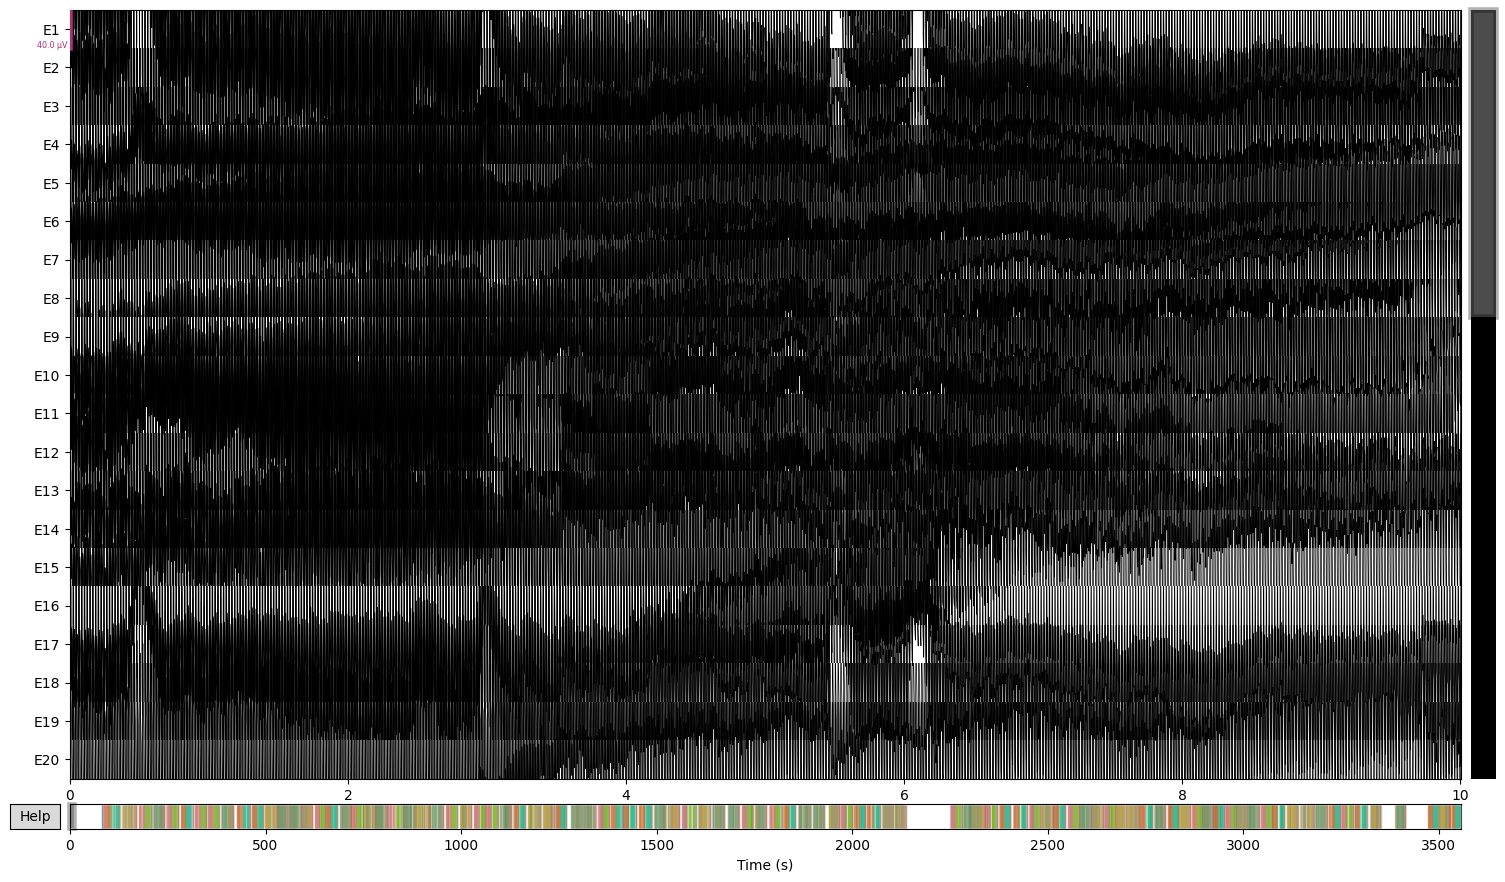

In [1]:
import mne
import os
import defusedxml


# Make sure your MFF folder ends with `.mff`
mff_dir = 'AA_20160922_113850.mff'  # Replace with your renamed folder path

# Load using generic loader (auto-detects MFF)
raw = mne.io.read_raw(mff_dir, preload=True)

# View info
print(raw.info)

# Check channel names and types
print("Channel names:", raw.ch_names)
print("Channel types:", raw.get_channel_types())


raw.plot(title='EEG Signal', block=True);


In [1]:
import torch 

: 

In [1]:
import torch
print(torch.__version__)              # e.g., '2.2.2'
print(torch.version.cuda)             # e.g., '11.8'
print(torch.cuda.is_available())      # True
print(torch.cuda.get_device_name(0))  # Your GPU model


: 

In [2]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 33 EEG, 17 Stimulus
 custom_ref_applied: False
 device_info: 1 item (dict)
 dig: 36 items (3 Cardinal, 33 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2016-09-22 06:08:49 UTC
 nchan: 50
 projs: []
 sfreq: 250.0 Hz
 utc_offset: +0530
>

Used Annotations descriptions: [np.str_('CELL'), np.str_('Cue+'), np.str_('Cue-'), np.str_('HCO+'), np.str_('HCO-'), np.str_('HRO+'), np.str_('HRO-'), np.str_('LCO+'), np.str_('LCO-'), np.str_('SESS'), np.str_('Samp'), np.str_('TRSP'), np.str_('bgin'), np.str_('blnk'), np.str_('fdec'), np.str_('resp'), np.str_('samp')]


C:\Users\suryansh\AppData\Local\Temp\ipykernel_16036\771521732.py:1: RuntimeWarning: DigMontage is only a subset of info. There is 1 channel position not present in the DigMontage. The channel missing from the montage is:

['Vertex Reference'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if this is not an EEG channel, or use the on_missing parameter if the channel position is allowed to be unknown in your analyses.
  raw.set_montage('GSN-HydroCel-32', on_missing='warn')


Event mapping: {np.str_('CELL'): 1, np.str_('Cue+'): 2, np.str_('Cue-'): 3, np.str_('HCO+'): 4, np.str_('HCO-'): 5, np.str_('HRO+'): 6, np.str_('HRO-'): 7, np.str_('LCO+'): 8, np.str_('LCO-'): 9, np.str_('SESS'): 10, np.str_('Samp'): 11, np.str_('TRSP'): 12, np.str_('bgin'): 13, np.str_('blnk'): 14, np.str_('fdec'): 15, np.str_('resp'): 16, np.str_('samp'): 17}


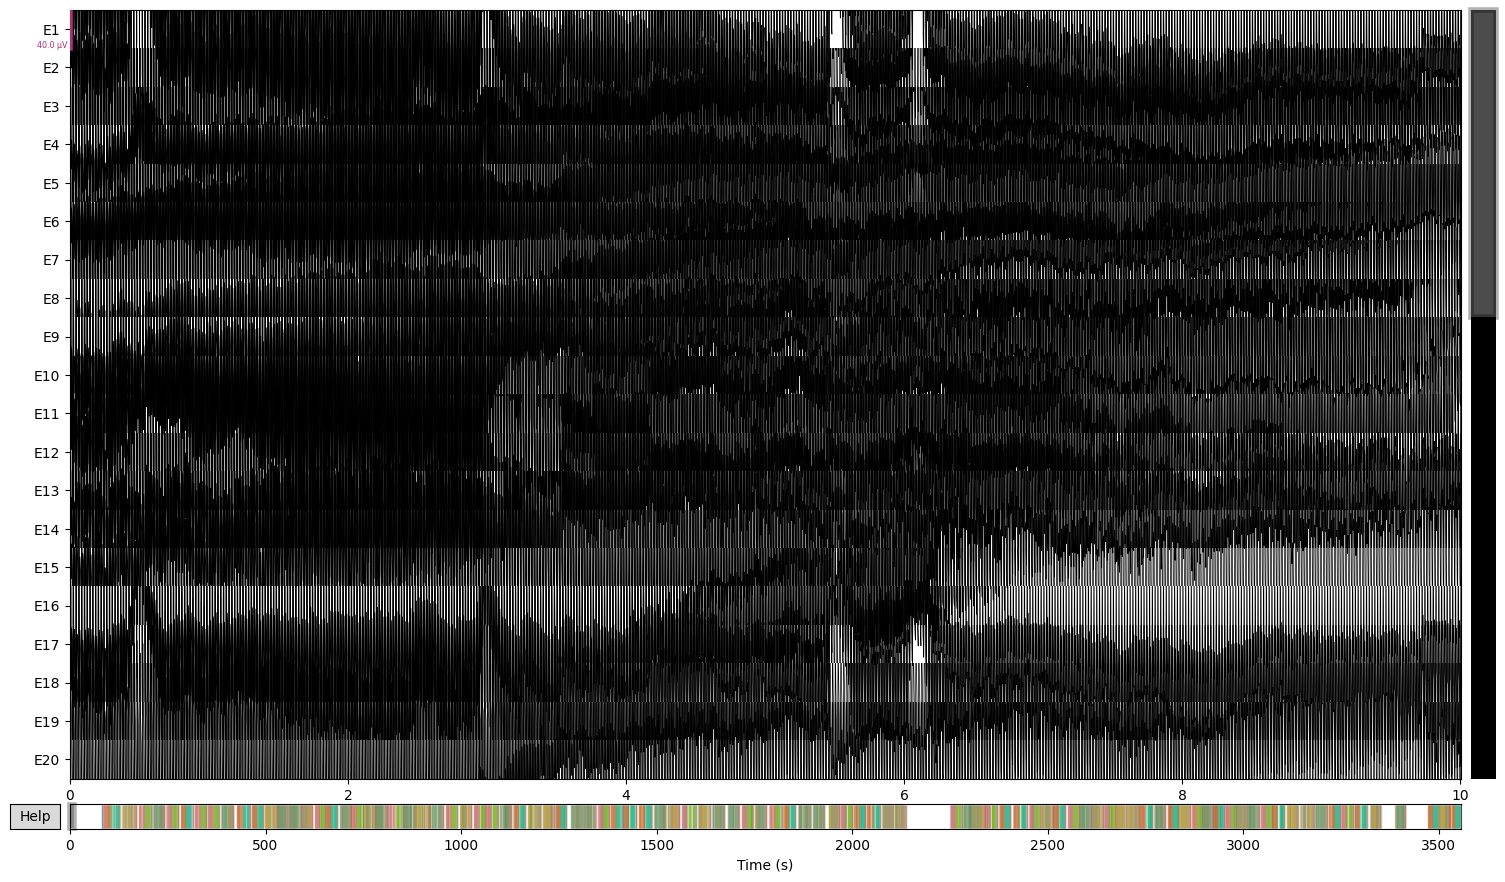

In [3]:
raw.set_montage('GSN-HydroCel-32', on_missing='warn')

# Extract events
events, event_id = mne.events_from_annotations(raw)
print("Event mapping:", event_id)

# Plot raw signal with event markers
raw.plot(events=events, title='EEG with events', block=True);

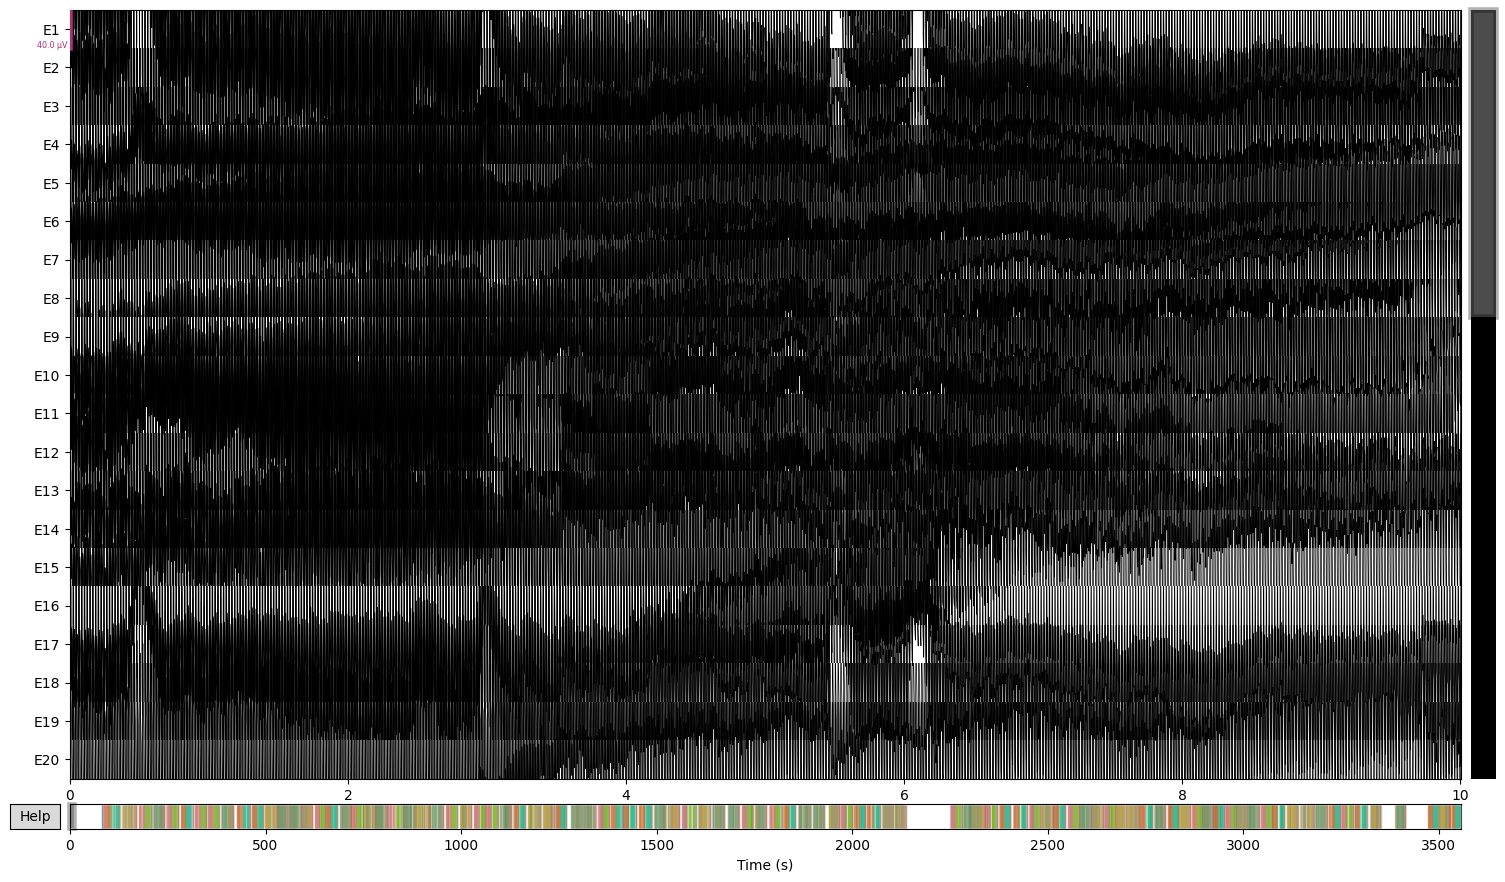

In [4]:
raw.plot();

In [5]:

# 3. Filtering
raw_notch = raw.copy().notch_filter(freqs=50)
raw = raw_notch.copy().filter(1, 40)


Filtering raw data in 2 contiguous segments
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 2 contiguous segments


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.6s finished


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.7s finished


In [6]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 33 EEG, 17 Stimulus
 custom_ref_applied: False
 device_info: 1 item (dict)
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2016-09-22 06:08:49 UTC
 nchan: 50
 projs: []
 sfreq: 250.0 Hz
 utc_offset: +0530
>

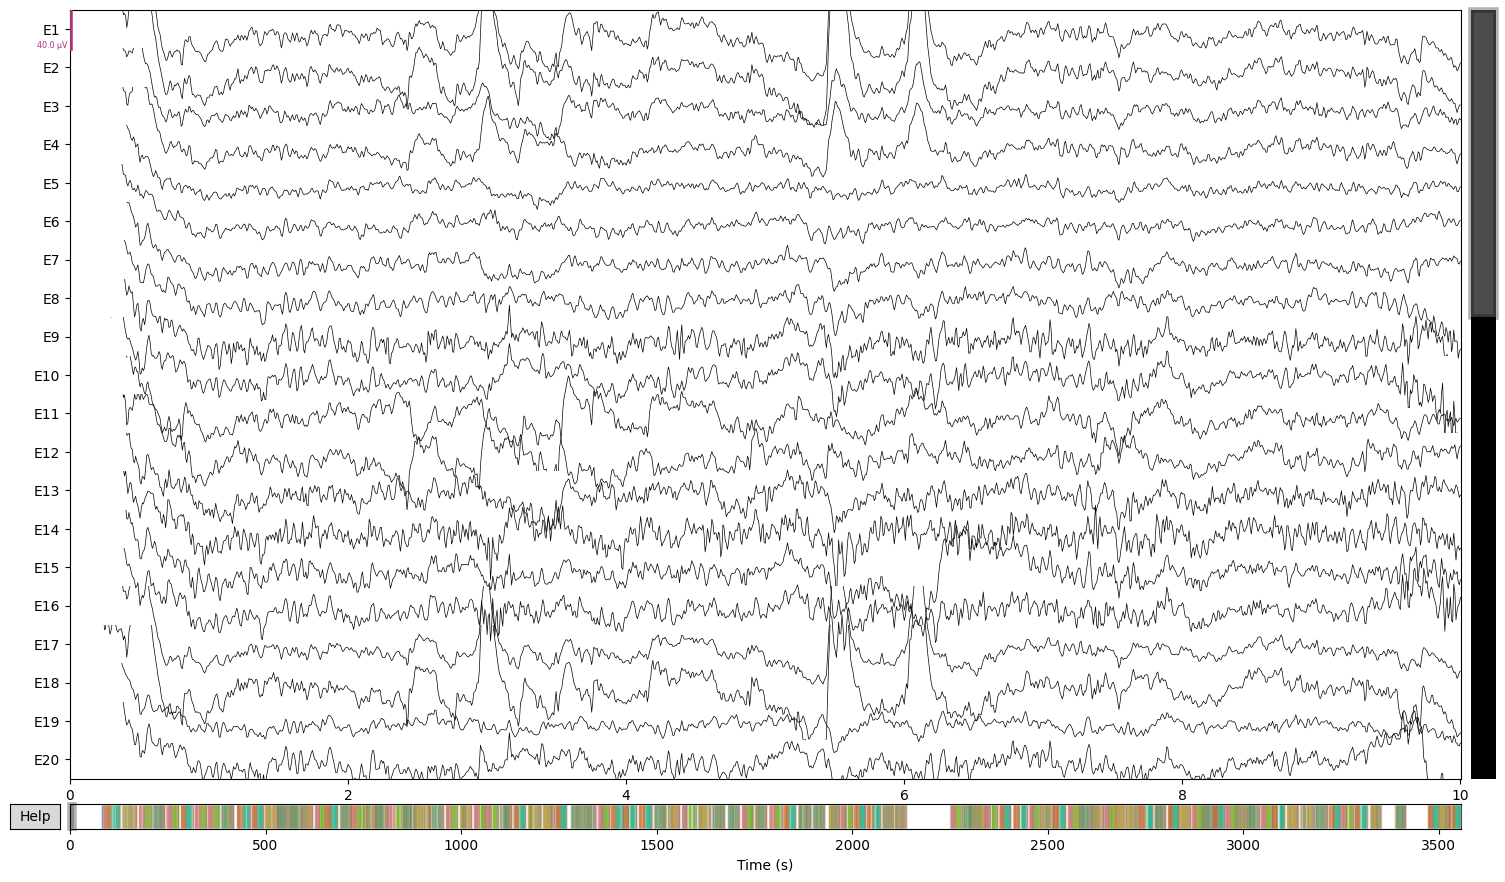

In [7]:
raw.plot();

In [8]:

# 5. Rereferencing
raw.set_eeg_reference('average', projection=False)



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawMff | signal1.bin, 50 x 889272 (3557.1 s), ~339.3 MiB, data loaded>

In [9]:
import mne
from mne.preprocessing import ICA, create_eog_epochs

# Step 1: Set EOG channel types
raw.set_channel_types({'E1': 'eog', 'E17': 'eog', 'E32': 'eog'})

# Step 2: Pick only EEG channels (exclude EOG automatically)
picks_eeg = mne.pick_types(raw.info, eeg=True, eog=False)

# Step 3: Filter the data for ICA (typically 1-40 Hz)
raw_filtered = raw.copy().filter(l_freq=1., h_freq=40., picks=picks_eeg)

# Step 4: Fit ICA
ica = ICA(n_components=30, random_state=42, max_iter='auto')
ica.fit(raw_filtered, picks=picks_eeg)

# Step 5: Automatically find ICA components correlating with EOG
eog_inds, scores = ica.find_bads_eog(raw_filtered, ch_name=['E1', 'E17', 'E32'])
print(f"Detected EOG-related ICA components: {eog_inds}")

# Optional: Visualize
ica.plot_components()            # View spatial topographies
ica.plot_scores(scores)          # View correlation scores
ica.plot_properties(raw_filtered, picks=eog_inds)  # Inspect EOG components in detail

# Step 6: Mark EOG components for exclusion
ica.exclude = eog_inds

# Step 7: Apply ICA to raw (removing EOG artifacts)
raw_clean = raw_filtered.copy()
ica.apply(raw_clean)

# Step 8: Plot cleaned data
raw_clean.plot(title='After ICA (EOG removed)')


Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 628 of 889272 (0.07%) samples, retaining 888644 (99.93%) samples.
Selecting by number: 30 components


FileNotFoundError: File c:\pc\iitmandi\EEG\AA_20160922_113850.mff\signal1.bin not found.

In [ ]:
raw_clean.info

<Info | 11 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 3 EOG, 30 EEG, 17 Stimulus
 custom_ref_applied: True
 device_info: 1 item (dict)
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2016-09-22 06:08:49 UTC
 nchan: 50
 projs: []
 sfreq: 250.0 Hz
 utc_offset: +0530
>

Not setting metadata
4515 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4515 events and 251 original time points ...
3 bad epochs dropped


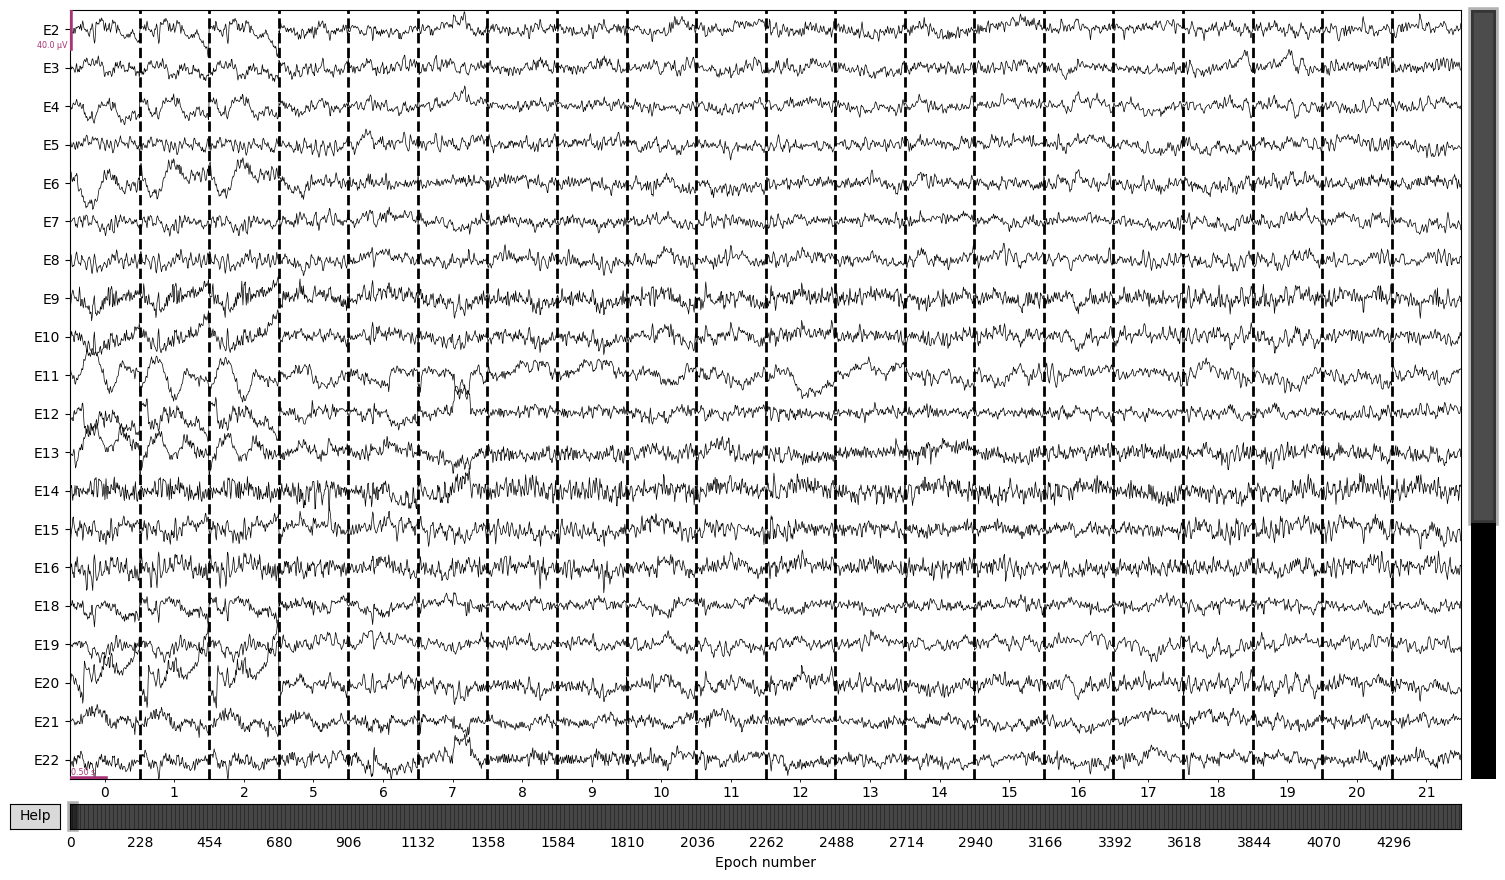

In [ ]:
# Define relevant event_ids for your contrast
event_id = {
    'CELL': 1,
    'Cue+': 2,
    'Cue-': 3,
    'HCO+': 4,
    'HCO-': 5,
    'HRO+': 6,
    'HRO-': 7,
    'LCO+': 8,
    'LCO-': 9,
    'SESS': 10,
    'Samp': 11,
    'TRSP': 12,
    'bgin': 13,
    'blnk': 14,
    'fdec': 15,
    'resp': 16,
    'samp': 17
}


epochs = mne.Epochs(raw_clean, events, event_id=event_id,
                    tmin=-0.2, tmax=0.8, baseline=(-0.2, 0),
                    preload=True)

epochs.plot(title="Cue+ and Cue- epochs");


In [ ]:
epochs.drop_bad()
print("Surviving epochs:", len(epochs))

Surviving epochs: 4512


Used Annotations descriptions: [np.str_('CELL'), np.str_('Cue+'), np.str_('Cue-'), np.str_('HCO+'), np.str_('HCO-'), np.str_('HRO+'), np.str_('HRO-'), np.str_('LCO+'), np.str_('LCO-'), np.str_('SESS'), np.str_('Samp'), np.str_('TRSP'), np.str_('bgin'), np.str_('blnk'), np.str_('fdec'), np.str_('resp'), np.str_('samp')]


C:\Users\suryansh\AppData\Local\Temp\ipykernel_7648\60605567.py:10: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)


<Figure size 1000x200 with 0 Axes>

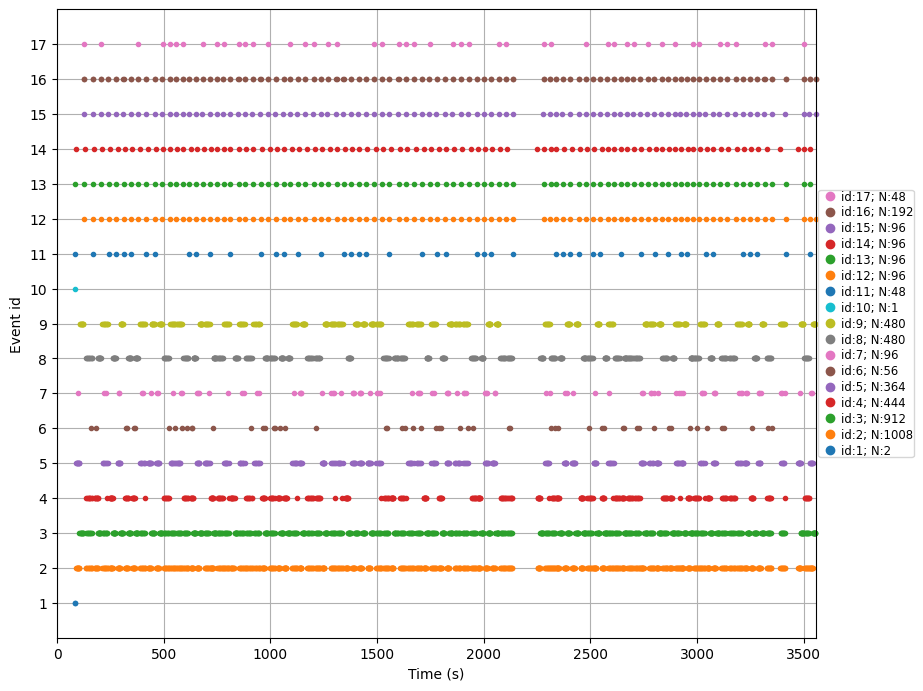

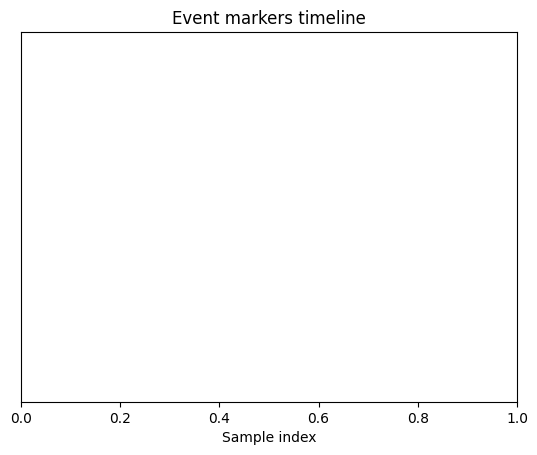

In [ ]:
import matplotlib.pyplot as plt
from mne.viz import plot_events

# assume you’ve already done:

events, event_id = mne.events_from_annotations(raw_clean)

# Plot all events on one timeline
plt.figure(figsize=(10, 2))
plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)
plt.title('Event markers timeline')
plt.xlabel('Sample index')
plt.yticks([])  # hide the artificial “channels” axis
plt.show();
